In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind


from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans  # K-Means clustering algorithm
import xgboost as xgb # XGBoost algorithm for gradient boosting

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

from sklearn.model_selection import cross_val_score

In [2]:
coral = pd.read_csv("data/coral_clean.csv")

pd.set_option('display.max_columns', None)

display(coral)

,date,latitude,longitude,ocean,realm,ecoregion,distance_to_shore,exposure,depth_m,turbidity,bleaching_level,percent_bleaching,cyclone_frequency,windspeed,sst,sst_maximum,ssta,ssta_maximum,ssta_frequency,tsa,ssta_dhw,tsa_maximum,tsa_frequency,tsa_dhw
0,2005-09-15,23.1630,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,10.00,0.0287,Colony,50.2,49.90,8.0,302.05,304.69,-0.46,2.24,0.0,-0.80,0.00,1.83,0.00,0.00
1,1991-03-15,-17.5750,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,14.00,0.0262,Colony,50.7,51.20,2.0,303.30,305.01,1.29,3.10,0.5,1.29,0.26,3.00,0.25,0.26
2,2006-01-15,18.3690,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,7.00,0.0429,Colony,50.9,61.52,8.0,299.18,304.14,0.04,2.83,16.0,-2.64,0.00,2.31,7.00,0.00
3,2006-04-15,17.7600,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,9.02,0.0424,Colony,50.9,65.39,3.0,299.61,304.07,-0.07,2.47,22.0,-2.27,0.00,2.19,3.00,0.00
4,2006-04-15,17.7690,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,12.50,0.0424,Colony,50.9,65.39,3.0,299.70,303.76,0.00,2.30,16.0,-2.19,0.00,1.87,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23198,2014-05-27,10.1167,99.8444,Pacific,Central Indo-Pacific,Gulf of Thailand,73.88,Exposed,5.00,0.0565,Population,100.0,50.27,2.0,304.79,306.89,1.40,3.74,2.0,1.26,1.37,3.35,1.00,1.33
23199,2005-10-23,18.3350,-64.8486,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,49.16,Sheltered,3.00,0.0586,Population,100.0,85.57,8.0,302.11,303.67,0.32,2.34,12.0,0.21,10.14,1.76,5.00,6.22
23200,2016-04-18,-13.5002,47.8825,Indian,Western Indo-Pacific,North Madagascar,8768.03,Sometimes,14.00,0.0628,Colony,100.0,35.71,5.0,303.45,305.32,0.63,2.50,9.0,0.59,5.81,2.46,4.00,4.44
23201,2015-09-10,24.5019,-81.6328,Atlantic,Tropical Atlantic,Bahamas and Florida Keys,8170.00,Exposed,4.00,0.1203,Colony,100.0,58.42,5.0,303.76,306.04,3.91,6.20,25.0,3.91,51.11,6.19,25.00,50.63


In [3]:
# LOWERCASE ALL DF

coral = coral.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/var/folders/yz/shh48k7s5kg3qtp0x9hzjb6c0000gn/T/ipykernel_39194/2964530727.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coral = coral.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [4]:
# DATE

coral['date'] = pd.to_datetime(coral['date'])
 
coral['month'] = coral['date'].dt.month  
coral['year'] = coral['date'].dt.year
  

<Axes: xlabel='month'>

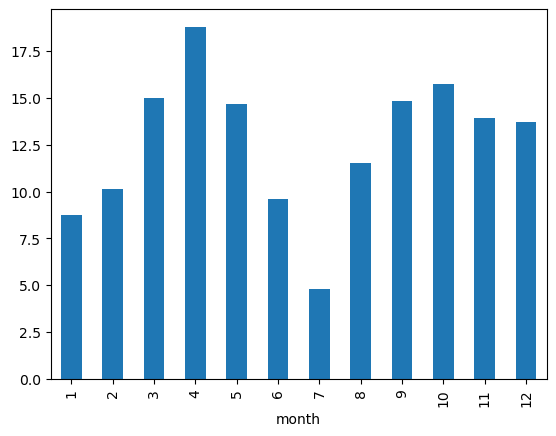

In [5]:
coral.groupby('month')['percent_bleaching'].mean().plot(kind='bar')

<Axes: xlabel='year'>

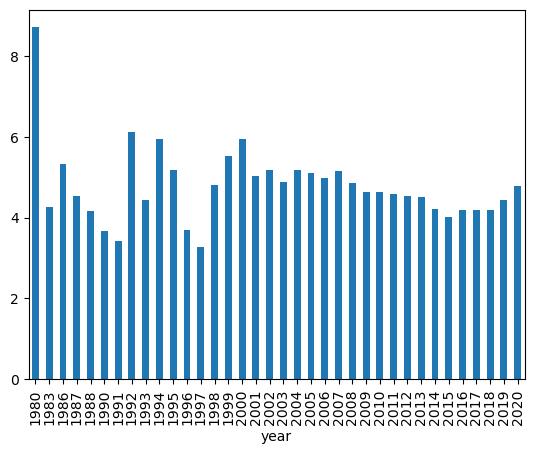

In [6]:
coral.groupby('year')['windspeed'].mean().plot(kind='bar')

In [7]:
coral.groupby(['year', 'ocean'])["sst"].mean()

year  ocean   
1980  pacific     297.143214
1983  atlantic    302.380000
      indian      301.890000
      pacific     302.545833
1986  indian      301.580000
                     ...    
2019  pacific     301.993598
      red sea     299.876579
2020  indian      301.374925
      pacific     301.374518
      red sea     301.376375
Name: sst, Length: 131, dtype: float64

In [8]:
# OCEAN 

coral["ocean"].value_counts()

ocean
atlantic        11199
pacific          9809
indian           1461
red sea           533
arabian gulf      201
Name: count, dtype: int64

In [9]:
# H0: mu pb arabian gulf = mu pb atlantinc = mu pb indian = mu pb pacific = mu pb read sea
# H1: mu pb arabian gulf != mu pb atlantinc != mu pb indian != mu pb pacific != mu pb read sea

#alpha = 0.05

tukey_ocean = pairwise_tukeyhsd(coral['percent_bleaching'], coral['ocean'])

print(tukey_ocean)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2  meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
arabian gulf atlantic   4.7152 0.0282   0.3224   9.1079   True
arabian gulf   indian   7.6558 0.0001   3.0121  12.2995   True
arabian gulf  pacific  -2.2328 0.6374   -6.631   2.1654  False
arabian gulf  red sea -10.4978    0.0  -15.607  -5.3885   True
    atlantic   indian   2.9406    0.0   1.2236   4.6577   True
    atlantic  pacific   -6.948    0.0  -7.8016  -6.0944   True
    atlantic  red sea -15.2129    0.0 -17.9495 -12.4764   True
      indian  pacific  -9.8886    0.0 -11.6196  -8.1576   True
      indian  red sea -18.1536    0.0 -21.2771   -15.03   True
     pacific  red sea   -8.265    0.0 -11.0103  -5.5196   True
--------------------------------------------------------------


In [10]:
coral['ocean'] = coral['ocean'].replace({'arabian gulf': 'pacific/arabian gulf', 'pacific': 'pacific/arabian gulf'})

In [11]:
# REALM

coral["realm"].value_counts()

realm
tropical atlantic              11185
central indo-pacific            8310
western indo-pacific            2040
eastern indo-pacific             946
temperate northern pacific       357
temperate australasia            273
tropical eastern pacific          78
temperate northern atlantic       14
Name: count, dtype: int64

In [12]:
#alpha = 0.05

tukey_realm = pairwise_tukeyhsd(coral['percent_bleaching'], coral['realm'])

print(tukey_realm)

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                      group2           meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------
       central indo-pacific        eastern indo-pacific  -0.8895 0.9472  -3.2473   1.4683  False
       central indo-pacific       temperate australasia  -4.0384 0.0733  -8.2648   0.1881  False
       central indo-pacific temperate northern atlantic   8.7704 0.8355  -9.6094  27.1502  False
       central indo-pacific  temperate northern pacific  -1.4673 0.9329  -5.1812   2.2467  False
       central indo-pacific           tropical atlantic   6.8473    0.0   5.8522   7.8425   True
       central indo-pacific    tropical eastern pacific  33.7602    0.0  25.9435  41.5768   True
       central indo-pacific        western indo-pacific   4.4833    0.0   2.7855   6.1811   True
       eastern indo-pacific   

In [13]:
group_mapping = {
    'central indo-pacific': 'central & eastern indo-pacific',
    'eastern indo-pacific': 'central & eastern indo-pacific',
    'temperate australasia': 'central & temperate australasia',
    'temperate northern atlantic': 'temperate northern atlantic & tropical atlantic',
    'temperate northern pacific': 'temperate northern pacific & temperate australasia',
    'temperate northern atlantic': 'temperate northern atlantic & tropical atlantic',
}

coral['realm'] = coral['realm'].replace(group_mapping)


In [14]:
# ECOREGION

coral['ecoregion'].value_counts()

ecoregion
bahamas and florida keys                      3802
belize and west caribbean                     3290
hispaniola puerto rico and lesser antilles    1902
sunda shelf south-east asia                   1236
sulu sea                                      1007
                                              ... 
central vietnam                                  1
isla de malpelo colombia                         1
rowley shoals west australia                     1
arnhem land north australia                      1
houtman abrolhos islands west australia          1
Name: count, Length: 113, dtype: int64

In [15]:
coral = coral.drop("ecoregion", axis=1)

In [16]:
# EXPOSURE 

coral["exposure"].value_counts()

exposure
sheltered    11758
exposed       9210
sometimes     2235
Name: count, dtype: int64

In [17]:
# H0: mu exposure exposed = mu exposure sheltered = mu exposure sometimes
# H1: mu exposure exposed != mu exposure sheltered != mu exposure sometimes

#alpha = 0.05

exposure_exposed = coral[coral["exposure"]=="exposed"]["percent_bleaching"]
exposure_sheltered = coral[coral["exposure"]=="sheltered"]["percent_bleaching"]
exposure_sometimes = coral[coral["exposure"]=="sometimes"]["percent_bleaching"]

st.f_oneway(exposure_exposed, exposure_sheltered, exposure_sometimes)

F_onewayResult(statistic=246.95574894285156, pvalue=7.484904893758175e-107)

In [18]:
tukey_exposure = pairwise_tukeyhsd(endog=coral["percent_bleaching"],  
                           groups=coral["exposure"],  
                           alpha=0.05)
print(tukey_exposure)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
  exposed sheltered  -4.8042   0.0 -5.5462 -4.0623   True
  exposed sometimes    5.524   0.0  4.2667  6.7813   True
sheltered sometimes  10.3283   0.0  9.0979 11.5586   True
---------------------------------------------------------


In [19]:
# --> all go in

In [20]:
# BLEACHING LEVEL

coral['bleaching_level'].value_counts()

bleaching_level
colony        11950
population    11253
Name: count, dtype: int64

In [21]:
#alpha = 0.05

bleaching_level_colony = coral[coral["bleaching_level"]=="colony"]["percent_bleaching"]
bleaching_level_population = coral[coral["bleaching_level"]=="population"]["percent_bleaching"]

st.f_oneway(bleaching_level_colony, bleaching_level_population)

F_onewayResult(statistic=5681.960684833286, pvalue=0.0)

In [22]:
tukey_bleaching_level = pairwise_tukeyhsd(endog=coral["percent_bleaching"],  
                           groups=coral["bleaching_level"],  
                           alpha=0.05)
print(tukey_bleaching_level)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------
colony population -20.4015   0.0 -20.932 -19.871   True
-------------------------------------------------------


In [23]:
coral_population = coral[coral['bleaching_level'] == "population"]
coral_colony = coral[coral['bleaching_level'] == "colony"]

# display(coral_population)
# display(coral_colony)

In [24]:
coral.groupby('bleaching_level')[['sst', 'sst_maximum', 'ssta', 'ssta_maximum', 'tsa']].mean()

,sst,sst_maximum,ssta,ssta_maximum,tsa
bleaching_level,,,,,
colony,301.619357,305.064858,0.333198,3.392758,-0.737765
population,301.247226,305.169963,0.251228,3.494187,-1.078987


In [25]:
t_stat, p_value = ttest_ind(coral_colony["tsa"], coral_population["tsa"], equal_var=False)
print(f't_stat: {t_stat}, p_value: {p_value}')

t_stat: 15.663163193097075, p_value: 5.1739783621004586e-55


In [26]:
coral.columns

Index(['date', 'latitude', 'longitude', 'ocean', 'realm', 'distance_to_shore',
       'exposure', 'depth_m', 'turbidity', 'bleaching_level',
       'percent_bleaching', 'cyclone_frequency', 'windspeed', 'sst',
       'sst_maximum', 'ssta', 'ssta_maximum', 'ssta_frequency', 'tsa',
       'ssta_dhw', 'tsa_maximum', 'tsa_frequency', 'tsa_dhw', 'month', 'year'],
      dtype='object')

In [27]:
# REMOVING NOISE

coral = coral[['latitude', 'longitude', 'ocean', 'realm', 'distance_to_shore',
       'exposure', 'depth_m', 'turbidity', 'bleaching_level',
       'percent_bleaching', 'cyclone_frequency', 'windspeed', 'sst',
       'sst_maximum', 'ssta', 'ssta_maximum', 'ssta_frequency', 'tsa',
       'ssta_dhw', 'tsa_maximum', 'tsa_frequency', 'tsa_dhw']]

In [28]:
coral

,latitude,longitude,ocean,realm,distance_to_shore,exposure,depth_m,turbidity,bleaching_level,percent_bleaching,cyclone_frequency,windspeed,sst,sst_maximum,ssta,ssta_maximum,ssta_frequency,tsa,ssta_dhw,tsa_maximum,tsa_frequency,tsa_dhw
0,23.1630,-82.5260,atlantic,tropical atlantic,8519.23,exposed,10.00,0.0287,colony,50.2,49.90,8.0,302.05,304.69,-0.46,2.24,0.0,-0.80,0.00,1.83,0.00,0.00
1,-17.5750,-149.7833,pacific/arabian gulf,central & eastern indo-pacific,1431.62,exposed,14.00,0.0262,colony,50.7,51.20,2.0,303.30,305.01,1.29,3.10,0.5,1.29,0.26,3.00,0.25,0.26
2,18.3690,-64.5640,atlantic,tropical atlantic,182.33,exposed,7.00,0.0429,colony,50.9,61.52,8.0,299.18,304.14,0.04,2.83,16.0,-2.64,0.00,2.31,7.00,0.00
3,17.7600,-64.5680,atlantic,tropical atlantic,313.13,exposed,9.02,0.0424,colony,50.9,65.39,3.0,299.61,304.07,-0.07,2.47,22.0,-2.27,0.00,2.19,3.00,0.00
4,17.7690,-64.5830,atlantic,tropical atlantic,792.00,exposed,12.50,0.0424,colony,50.9,65.39,3.0,299.70,303.76,0.00,2.30,16.0,-2.19,0.00,1.87,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23198,10.1167,99.8444,pacific/arabian gulf,central & eastern indo-pacific,73.88,exposed,5.00,0.0565,population,100.0,50.27,2.0,304.79,306.89,1.40,3.74,2.0,1.26,1.37,3.35,1.00,1.33
23199,18.3350,-64.8486,atlantic,tropical atlantic,49.16,sheltered,3.00,0.0586,population,100.0,85.57,8.0,302.11,303.67,0.32,2.34,12.0,0.21,10.14,1.76,5.00,6.22
23200,-13.5002,47.8825,indian,western indo-pacific,8768.03,sometimes,14.00,0.0628,colony,100.0,35.71,5.0,303.45,305.32,0.63,2.50,9.0,0.59,5.81,2.46,4.00,4.44
23201,24.5019,-81.6328,atlantic,tropical atlantic,8170.00,exposed,4.00,0.1203,colony,100.0,58.42,5.0,303.76,306.04,3.91,6.20,25.0,3.91,51.11,6.19,25.00,50.63


In [29]:
# CREATING DUMMIES 

coral = pd.get_dummies(coral, columns=["ocean", "realm", "exposure", "bleaching_level"], drop_first=True)

In [30]:
# INTERACTIONS

# coral["ssta_depth_interaction"] = coral["ssta"] * coral["depth_m"]
# coral["sst_tsa_interaction"] = coral["ssta"] * coral["tsa"]

# coral["sst_depth_interaction"] = coral["sst"] * coral["depth_m"]
# coral["sst_exposure_sheltered"] = coral["sst"] * coral["exposure_sheltered"]

# coral["sst_max_depth_interaction"] = coral["sst_max"] * coral["depth_m"]
# coral["sst_max_exposure_interaction"] = coral["sst_max"] * coral["exposure_sheltered"]
# coral["sst_max_cyclone_interaction"] = coral["sst_max"] * coral["cyclone_frequency"]

# coral["ssta_sst_interaction"] = coral["ssta"] * coral["sst"]


In [31]:
coral[['depth_m', 'distance_to_shore']]

,depth_m,distance_to_shore
0,10.00,8519.23
1,14.00,1431.62
2,7.00,182.33
3,9.02,313.13
4,12.50,792.00
...,...,...
23198,5.00,73.88
23199,3.00,49.16
23200,14.00,8768.03
23201,4.00,8170.00


In [32]:
# CHECKING FOR OUTLIERS

numerical_columns = coral.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

non_outliers = ~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)

coral = coral[non_outliers]

coral


,latitude,longitude,distance_to_shore,depth_m,turbidity,percent_bleaching,cyclone_frequency,windspeed,sst,sst_maximum,ssta,ssta_maximum,ssta_frequency,tsa,ssta_dhw,tsa_maximum,tsa_frequency,tsa_dhw,ocean_indian,ocean_pacific/arabian gulf,ocean_red sea,realm_central & temperate australasia,realm_temperate northern atlantic & tropical atlantic,realm_temperate northern pacific & temperate australasia,realm_tropical atlantic,realm_tropical eastern pacific,realm_western indo-pacific,exposure_sheltered,exposure_sometimes,bleaching_level_population
1849,24.4571,124.0986,434.38,5.0,0.0422,0.00,50.23,6.0,300.94,305.10,-0.50,3.05,4.00,-1.26,0.00,2.89,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False
1850,24.7998,125.1786,842.80,10.0,0.0440,0.00,68.54,5.0,299.15,304.35,-0.80,3.38,8.00,-2.82,4.15,2.38,1.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False
1851,26.2476,127.6682,75.90,0.5,0.0420,0.00,67.60,4.0,301.26,304.27,-0.28,2.78,4.00,-0.34,1.35,2.66,0.00,0.00,False,True,False,False,False,False,False,False,False,True,False,False
1852,26.2752,127.7141,49.66,10.0,0.0438,0.00,65.56,7.0,302.52,304.28,1.34,2.92,3.67,0.95,0.34,2.70,0.33,0.00,False,True,False,False,False,False,False,False,False,False,False,False
1853,26.4435,127.7727,12.45,1.5,0.0341,0.00,64.30,5.0,301.95,304.95,0.25,3.73,4.00,0.20,0.00,3.19,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,18.7083,-87.7056,700.14,10.0,0.0279,32.52,49.10,7.0,301.24,304.60,-0.20,3.48,2.00,-1.02,0.00,2.32,2.00,0.00,False,False,False,False,False,False,True,False,False,False,True,False
22463,18.7083,-87.7056,700.14,10.1,0.0279,32.52,49.10,7.0,301.24,304.60,-0.20,3.48,2.00,-1.02,0.00,2.32,2.00,0.00,False,False,False,False,False,False,True,False,False,False,True,False
22464,18.7083,-87.7056,700.14,10.3,0.0279,32.52,49.10,7.0,301.24,304.60,-0.20,3.48,2.00,-1.02,0.00,2.32,2.00,0.00,False,False,False,False,False,False,True,False,False,False,True,False
22465,24.9992,-80.4670,3316.00,4.3,0.1405,32.55,62.54,4.0,303.17,305.61,1.24,3.61,15.00,-0.04,4.54,2.39,2.00,2.84,False,False,False,False,False,False,True,False,False,True,False,False


In [33]:
# # CLUSTERS

# geo_env_features = coral[['depth_m', 'distance_to_shore']]
# kmeans_env = KMeans(n_clusters=4, random_state=42)
# coral['geo_env_cluster'] = kmeans_env.fit_predict(geo_env_features)

# coral

In [34]:
# FEATURE SELECTION

features = coral.drop(['percent_bleaching'], axis=1)
target = coral["percent_bleaching"]

In [35]:
# TRAINING MODEL

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

In [36]:
# NORMALIZING VALUES

normalizer = MinMaxScaler()

normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [37]:
# XGBOOST

import xgboost

xbg_r = xgboost.XGBRegressor(n_estimators=100, max_depth=4)

In [38]:
xbg_r.fit(X_train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
pred = xbg_r.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", xbg_r.score(X_test_norm, y_test))

MAE 3.1492168719421234
RMSE 5.4864666128350255
R2 score 0.3990619269273894


In [40]:
# CHECK OVERFIT 

pred = xbg_r.predict(X_train_norm)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(pred, y_train))
print("R2 score", xbg_r.score(X_train_norm, y_train))

MAE 2.325848534431624
RMSE 3.929781161293329
R2 score 0.7074069335163496
